In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
import os

In [3]:
for file in os.listdir('../Downloads/'):
    print(file)

multiTimeline.csv
.DS_Store
whoscoredGameStats.csv
.localized
understatGameStats.csv
laliga_champions.png
laliga_champions.py
ETH_LSTM.ipynb
laliga_champions (1).png


In [4]:
whoscored = pd.read_csv('../Downloads/whoscoredGameStats.csv', parse_dates = ['Date'])
understat = pd.read_csv('../Downloads/understatGameStats.csv', parse_dates = ['Date'])

In [187]:
def loggg(f):
    
    def wrapper(dataf, *args, **kwargs):
        before = len(dataf)
        dataf = f(dataf, *args, **kwargs).copy()
        print('Number of matches left: {}'.format(len(dataf)))
        return dataf
    return wrapper

@loggg
def start_pipeline(dataf):
    return dataf.copy()

@loggg
def clean_columns(dataf):
    dataf.columns = [c.replace(" ","") for c in dataf.columns]
    return dataf


@loggg
def select_season(dataf, season):
    
    season_filt = (dataf.Date > datetime.datetime(season, 8 , 1)) & (dataf.Date < datetime.datetime(season+1, 8,1))
    dataf = dataf.loc[season_filt,:].copy()
    
    return dataf

@loggg
def select_team(dataf, team):
    if team not in dataf.Home.unique():
        print('No team: {} in df'.format(team))
        return dataf
    team_filt = (dataf.Home == team) | (dataf.Away == team)
    dataf = dataf.loc[team_filt,:].copy()
    return dataf
    

In [188]:
epl2018 = (whoscored
    .pipe(start_pipeline)
    .pipe(clean_columns)
    .pipe(select_season, season = 2018)) # 2018 meaning season 18-19

epl2017 = (whoscored
          .pipe(start_pipeline)
          .pipe(clean_columns)
          .pipe(select_season, season = 2017))

Number of matches left: 1880
Number of matches left: 1880
Number of matches left: 380
Number of matches left: 1880
Number of matches left: 1880
Number of matches left: 380


In [155]:
agg_stats = df.groupby('Home').agg(
    avg_against_shots = ('AwayShots', np.mean),
    avg_successful_tackles = ('HomeSuccessfulTackles', np.mean),
    avg_home_dispossed = ('HomeDispossessed', np.mean),
    avg_home_interception = ('HomeInterceptions', np.mean),
    avg_clearences = ('HomeClearances', np.mean))

In [158]:
def polar_plot(*values, **kwargs):
    
    ax = plt.subplot(111, polar = True)
    ax.set_title(kwargs['title'])
    n = len(values[0])
    
    theta = np.linspace(0.0, 2*np.pi, n+1, endpoint = True)
    
    for i, team_stats in enumerate(values):
        team_name = kwargs['teams'][i]
        ax.plot(theta, np.append(team_stats, team_stats[0]), label = team_name, color = kwargs['colors'][i])
        ax.fill(theta[:n], team_stats, alpha = 0.1, color = kwargs['colors'][i])
    
    lines, labels = plt.thetagrids(np.linspace(0,360, n, endpoint = False), labels = kwargs['params'])
    
    ax.legend()

    return ax

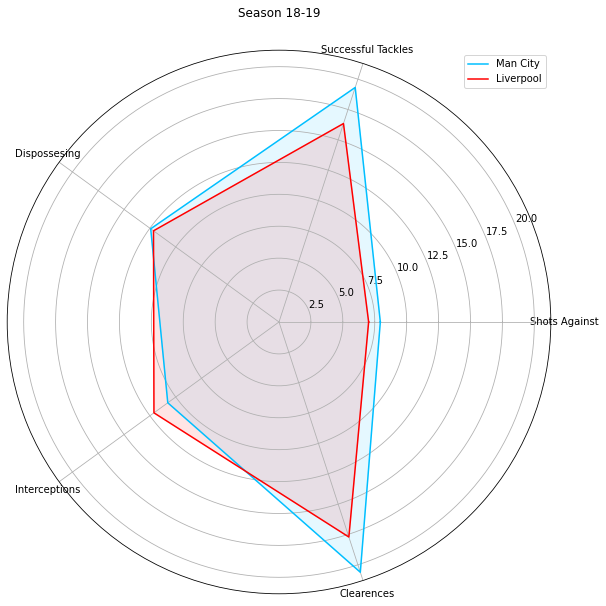

In [159]:
liverpool = agg_stats.loc['Liverpool',:]
man_city = agg_stats.loc['Man City',:]

plt.subplots(figsize=(10,10))

label = ['Shots Against','Successful Tackles','Dispossesing','Interceptions','Clearences']
liverpool = polar_plot(liverpool,man_city, params = label, teams = ['Man City','Liverpool'], colors = ['deepskyblue','red'], title = 'Season 18-19')

Unfortunately I don't have any current season data in this dataset. So I guess i'll have to scrape it myself. Hopefully will be done soon